In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [4]:
# Check if MPS is available (Apple Silicon), otherwise fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Load the pretrained InceptionV3 model and set to evaluation mode
model = models.inception_v3(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)  # CIFAR-10 has 10 classes

# Load the saved model state
model.load_state_dict(torch.load('inception_cifar10.pth', map_location=device))
model = model.to(device)
model.eval()

/Users/sarthaktanwar/Coding/python-projects/Transfer-Inception-CIFAR/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sarthaktanwar/Coding/python-projects/Transfer-Inception-CIFAR/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/sarthaktanwar/Coding/python-projects/Transfer-Inception-CIFAR/venv/lib/python3.12/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), plea

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [5]:
print(device)

mps


In [6]:
# Preprocessing transformation
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [18]:
def process_image(path, transform=transform):
    # Load and preprocess the image
    image_path = path  # Update with your image path
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure it's in RGB mode

    # Apply transformations (resize, normalize)
    input_image = transform(image).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        outputs = model(input_image)
        _, predicted_class_idx = torch.max(outputs, 1)

    # Get the corresponding class label
    predicted_class = cifar10_classes[predicted_class_idx.item()]
    print(f'Predicted Class: {predicted_class}')

    # Convert the image back to a format for display (denormalize)
    image_np = input_image.cpu().squeeze().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Reverse normalization

    # Plot the image with the prediction
    plt.imshow(image_np)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

Predicted Class: cat


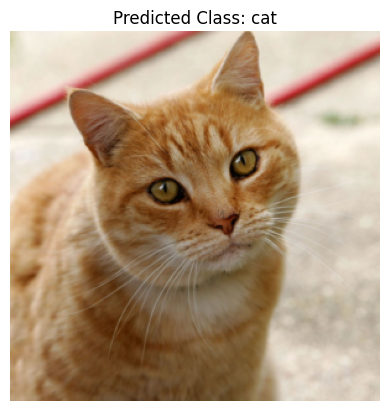

In [29]:
process_image('testing/cat.jpg')

Predicted Class: airplane


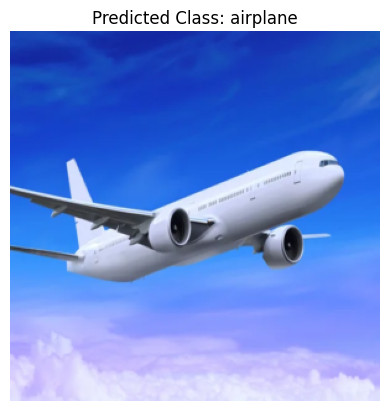

In [31]:
process_image('testing/aeroplane.jpg')

Predicted Class: bird


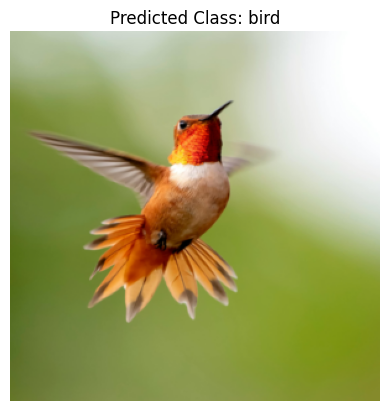

In [33]:
process_image('testing/bird.jpg')

Predicted Class: frog


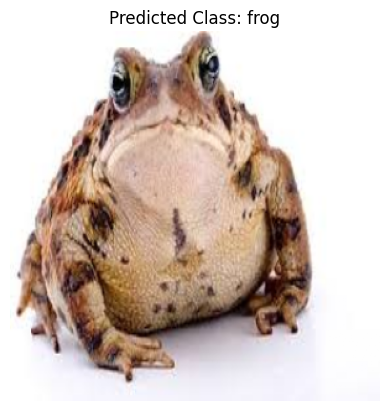

In [34]:
process_image('testing/frog.jpeg')